<a href="https://colab.research.google.com/github/SachinScaler/Oct24HypothesisTesting/blob/main/Advanced_Hypothesis_Testing_%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Two Way Anova

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/beverage.csv')
df

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170
...,...,...,...
95,Lemon,South,131
96,Lemon,East,103
97,Orange,West,117
98,Lemon,South,82


In [5]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [6]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

#### We need to install a new package for 2 way anova:

In [7]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.6 MB/s eta 0:00:00


In [8]:
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [9]:
import pingouin as pg

# perform two-way ANOVA
# dv = Name of column containing the dependent variable
# between = Name of column(s) in data containing the between-subject factor(s). (Independent Variables)

model = pg.anova(dv='Sales', between=['Location', 'Flavour'], data=df)

# Display the results
print(round(model,4))

               Source           SS    DF         MS       F   p-unc     np2
0            Location    2059.2739   3.0   686.4246  0.3905  0.7601  0.0131
1             Flavour    6919.5590   2.0  3459.7795  1.9685  0.1458  0.0428
2  Location * Flavour   11802.2578   6.0  1967.0430  1.1192  0.3578  0.0709
3            Residual  154669.0163  88.0  1757.6025     NaN     NaN     NaN



<font color='violet'>Brief explanation of each term represents:</font>

1. <font color='orange'>**SS (Sum of Squares):**</font> Represents the total variation in the response variable (Sales) explained by each source (Location, Flavour, Interaction, or Residual).
      - Example: Tells you how much the variation in Sales can be attributed to differences in Flavour compared to the overall average.
2. <font color='orange'>**DF (Degrees of Freedom):**</font> It represents the number of values in the final calculation of a statistic that are free to vary.
      - In ANOVA, it's associated with the factor being tested. For example, "df" for Flavour is the number of levels of Flavour minus 1.
3. <font color='orange'>**MS (Mean Squares):**</font> Calculated as SS divided by DF, it represents the average variation in Sales explained by each source, assuming equal variances across groups.
4. <font color='orange'>**F (F-Statistic):**</font> It's a measure of the ratio of the variance between groups (explained variance) to the variance within groups (unexplained variance).
      - A high F-value indicates a significant difference between groups, while a low F-value suggests that the groups are similar.
5. <font color='orange'>**p-unc (p-value):**</font> This is the probability associated with the F-statistic. It indicates the likelihood that the observed differences in group means occurred by chance.
      - A low p-value (typically less than 0.05) suggests that the factor has a significant effect, while a high p-value suggests a lack of significance.
6. <font color='orange'>**np2 (partial eta-squared):**</font> Represents the proportion of variance in Sales explained by a specific source (e.g., Flavour) relative to the total variance. Values closer to 1 indicate a larger effect size.
      - Example: allows you to estimate the proportion of variance in Sales that can be explained by the difference between Orange and Lemon flavours.
7. <font color='orange'>**Residual**:</font> This represents the variation in the data that is not accounted for by the factors (Flavour, Location, and their interaction).
      - It is the unexplained or leftover variability after considering the effects of the specified factors.
      - We will learn more about this in future modules.


### Conclusion of Test
We defined $α = 0.05$ for confidence level 95%

The above table shows the summary of results from our Two-Way ANOVA analysis.

<font color='violet'>1. **Flavour:**</font>
   - `p-unc`: The p-value is 0.1458, which is greater than the significance level of 0.05. As a result, **you do not have enough evidence to reject the null hypothesis**, suggesting that there is no significant effect of flavor on sales.

<font color='violet'>2. **Location:**</font>
   - `p-unc`: The p-value is 0.7601, which is greater than 0.05. Therefore, **you do not have enough evidence to reject the null hypothesis**, suggesting that there is no significant effect of location on sales.

<font color='violet'>3. **Flavour:Location (Interaction Effect):**</font>
   - `p-unc`: The p-value is 0.3578, which is greater than 0.05. This suggests that **there is no significant interaction in the effect between flavour and location on sales.**

Overall, the data suggests that neither the choice of flavour, the location of sale, nor their interaction significantly affect the sales of the soft drinks.



### HW: POST READ Interaction Plot

Let's verify that the interaction of flavour and location is not significantly affect the sales of the soft drinks.

We will verify this using interaction plot of statsmodels.


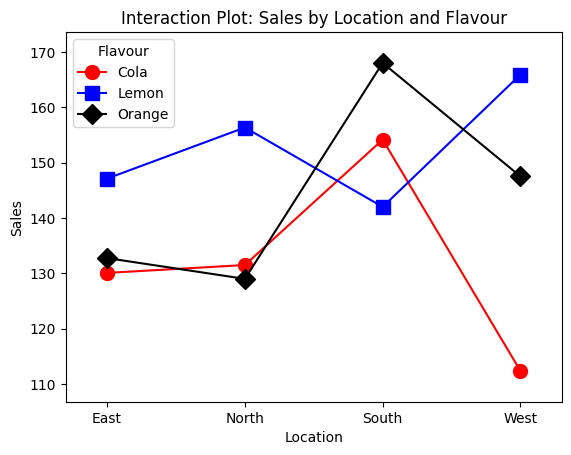

In [10]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig = interaction_plot(df.Location, df.Flavour, df.Sales, colors=['red','blue', 'black'], markers=['o', 's', 'D'], ms=10)

# Add axis labels and a title
plt.xlabel("Location")
plt.ylabel("Sales")
plt.title("Interaction Plot: Sales by Location and Flavour")

# Show the plot
plt.show()



We can observe that:

**Cola (Red, Oval Marker):**
- Sales start from around 130 in the east, increase to approximately 132 in the north, peak at 152 in the south, and decrease to around 110 in the west.

**Lemon (Blue, Square Marker):**
- Sales start from around 147 in the east, increase to approximately 155 in the north, decrease to around 140 in the south, and peak at 165 in the west.


**Orange (Black, Diamond Marker):**
- Sales start from around 132 in the east, decrease to approximately 129 in the north, peak at 166 in the south, and decrease to around 145 in the west.

<br>

**Observations:**

- For each flavor, the sales pattern varies across different locations.
- There is no consistent pattern across all flavors and locations.
- The lines representing different flavors are not entirely parallel, suggesting some variability in the effect of location on sales for each flavor.

**Interpretation:**
- The observed patterns in the interaction plot align with the ANOVA result, where the p-value for the interaction effect was not significant (0.357804).
- The non-significant p-value suggests that the observed variations in sales across different flavors and locations may occur due to random chance, and there is no strong evidence for a significant interaction effect.

**Conclusion:**
The interaction plot supports the ANOVA result by showing variable patterns across flavors and locations, which is consistent with a non-significant interaction effect.</font>

### KS Test:
Non Parametric Test for comparing two Distributions
https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test


In [11]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

**Null Hypothesis (H0):** The distribution of X is the same as the distribution of Y.

**Alternative Hypothesis (H1):** The distribution of X is different from the distribution of Y.

#### recovery times of patients who took medicine-1


In [12]:
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

#### recovery times of patietnts who took medicine-2


In [13]:
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [14]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [15]:
d1.mean(), d2.mean()

(7.1049166262, 8.073423327583333)

In [16]:
from scipy import stats


statistic, p_value =  stats.kstest(d1, d2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.3233333333333333
P-value: 1.516338798228849e-05


In [17]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is less than or equal to 0.01, two samples have different distributions.


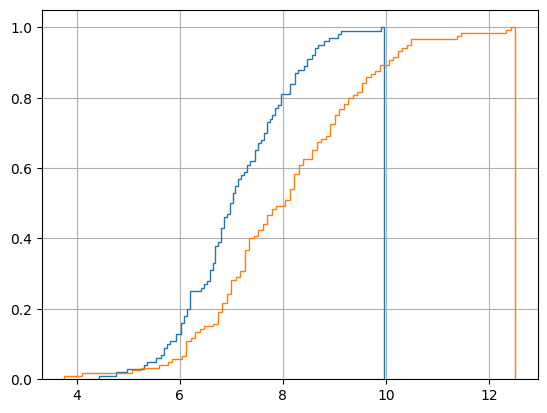

In [18]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

### HW: Youtube Watch Time.


<font color='violet'>Let's say you are a data scientist at YouTube and you may want to analyze user watch time based on the number of ads in the ad break.</font>

- Should YouTube just roll out this 2 ads per ad break feature to all its users, thinking it will generate more revenue?
- Or should it just stick to 1 ad per ad break thinking the watch time of users will drop?
  - Well, we obviously can't rely just on gut feeling.

We have to test the feature on some people before we roll it out to the masses
- Whenever we want to test the consequences of a new feature
- We usually perform tests on two groups


<font color='violet'>1. Treatment Group</font>
  - To which we introduce the new feature
  - Treat them with a new feature

<font color='violet'>2. Control Group</font>
  - To which we do NOT introduce the new feature
  - No new treatment

Everything else between the Treatment and Control groups remains SAME like the Day and Time of the experiment ... etc etc
- Just the new feature is introduced to the Treatment Group and NOT to the Control Group

In general, it's called **"A/B Testing"** Experiment.


In [19]:
ab_test_data = pd.read_csv("https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/ab_test_yt_data.csv")

ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [20]:
ab_test_data['customer_segmnt'].value_counts()

,count
customer_segmnt,
treatment,9987
control,9973


In [ ]:
ab_test_data.info()

our A/B Test Data has:

- Date on which observation was taken
- Customer ID for each user
- premium - It tells whether a customer has a premium subscription (ad-free) to YouTube or NOT.
  - 0 means the customer has NOT purchased a premium subscription
  - 1 means the customer has purchased a premium subscription
  - We will not use this attribute for our Hypothesis Testing today
- **Watch time** of each user in **hours**
- Whether the user was in **Treatment Group or Control Group**

Keep in mind that:

- Users belonging to the **Treatment Group** are shown **2 ads** per ad break
- Users in the **Control Group** are shown **1 ad** per ad break
- We have data of total 19,960 users


<font color='violet'>Whether YouTube should roll out the new feature of 2 ads per ad break?
Or should it just stick to showing 1 ad per ad break?</font>

<font color='violet'>What are our Null and Alternate Hypotheses?</font>

- Null Hypothesis ($H_0$): Mean Watch Time of Users given 2 ads = Mean Watch Time of Users given 1 ad per ad break
- Alternative Hypothesis ($H_1$): Mean Watch Time of Users given 2 ads <> Mean Watch Time of Users given 1 ad per ad break

**Question:** Check the p-value against alpha of 0.05

and tell if can we Reject the Null Hypothesis and go with the Alternate Hypothesis.



## Resume: 8:35

<Axes: xlabel='watch_time_hrs', ylabel='Count'>

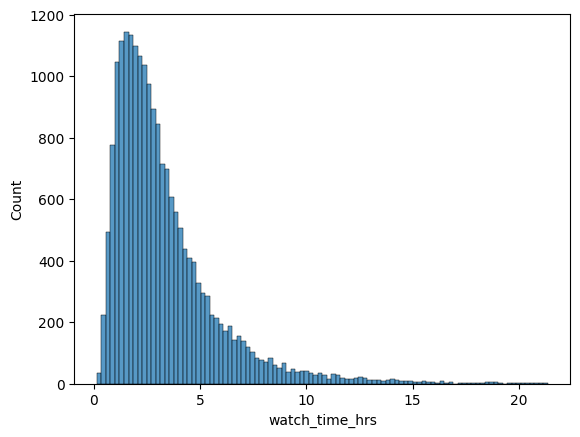

In [21]:
import seaborn as sns

sns.histplot(ab_test_data['watch_time_hrs'], bins = 100)

- can you try to convert this into normal

<Axes: xlabel='watch_time_hrs', ylabel='Count'>

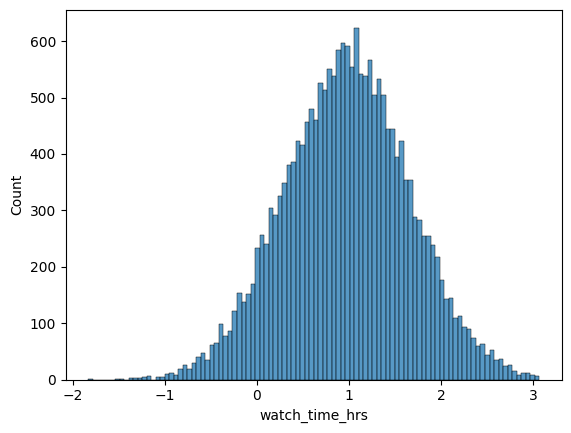

In [22]:
sns.histplot(np.log(ab_test_data['watch_time_hrs']), bins = 100)

In [24]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

,watch_time_hrs
customer_segmnt,
control,3.609960
treatment,3.054294


In [25]:
a = ab_test_data[ab_test_data['customer_segmnt'] == 'control']['watch_time_hrs']
b = ab_test_data[ab_test_data['customer_segmnt'] == 'treatment']['watch_time_hrs']

In [26]:
from scipy.stats import ttest_ind

stats, p_val = ttest_ind(a, b)
print("stats", stats)
print("p_val", p_val)

stats 15.96034913022092
p_val 5.438408586231319e-57


Conclusion:
- p_val < 0.05
- reject H0
- There is significant difference among watch time


### <font color='sky blue'>Parametric vs Non-parametric </font>

#### <font color='violet'>Parametric Hypothesis Testing:</font>

<font color='orange'>Assumptions:</font>

- Make specific assumptions about the underlying population distribution, often assuming normality (bell-shaped curve).
- Generally more powerful (better at detecting true effects) when assumptions are met.
- More powerful when assumptions are met, especially with large sample sizes

#### <font color='violet'>Non-Parametric Hypothesis Testing:</font>

<font color='orange'>Assumptions:</font>

- Make fewer or no assumptions about population distribution.
- Useful when parametric assumptions are violated or for non-normally distributed data.
- Non-parametric tests are generally less powerful but more robust than parametric tests when data conforms to parametric assumptions.

Let's see for each test we have learned till now, indicating whether it is parametric or non-parametric and the reasons why:

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/068/290/original/Screen_Shot_2024-03-18_at_15.11.25_PM.png?1710754908" width="800" height="450"> <br />

